# 🤖 **Customer Support Chatbot: An Overview**

A **Customer Support Chatbot** is an AI-powered virtual assistant designed to interact with customers in real-time. By leveraging **Natural Language Processing (NLP)** and **Machine Learning (ML)**, these bots resolve queries, guide users through processes, and provide solutions without human intervention.

<div align="center">
    <img src="https://github.com/MarpakaPradeepSai/Advanced-Event-Ticketing-Customer-Support-Chatbot/blob/main/Data/Images%20&%20GIFs/Google_AI_Studio_2025-10-25T04_37_52.808Z.png?raw=true" width="600" alt="Chatbot Overview"/>
</div>

### 🌐 **Deployment Channels**
*   **Websites:** Live chat widgets for instant navigation and support.
*   **Mobile Apps:** Integrated in-app assistance.
*   **Messaging Platforms:** WhatsApp, Facebook Messenger, Slack, and Telegram.
*   **Direct Channels:** Automated Email and SMS responses.

---

### 🚀 **Key Benefits & Impact**
Building a chatbot provides significant advantages for both the business and the end-user:

*   **24/7 Availability:** Provides instant responses round-the-clock, eliminating wait times outside business hours.
*   **Operational Efficiency:** Automates repetitive FAQs and high-volume queries, allowing human agents to focus on complex cases.
*   **Cost Scalability:** Manages thousands of simultaneous conversations, reducing the need for proportional hiring as the company grows.
*   **Enhanced Experience:** Offers consistent, error-free information and personalized recommendations based on user history.
*   **Global Reach:** Breaks language barriers with native multilingual support.
*   **Data-Driven Insights:** Tracks common pain points and user trends to inform business strategy.

---

### 🛠️ **Common Use Cases**

1.  **Self-Service Support:** Tracking orders, initiating returns, and checking refund status in real-time.
2.  **Scheduling & Bookings:** Automating appointment setting, rescheduling, and cancellations with instant confirmations.
3.  **Technical Troubleshooting:** Providing step-by-step guided solutions for common product issues.
4.  **Financial Inquiries:** Handling billing questions, invoice requests, and payment failure resolutions.
5.  **Lead Generation:** Engaging visitors proactively to qualify leads and capture contact information.
6.  **Account Management:** Assisting with password resets, profile updates, and security verifications.
7.  **Feedback Collection:** Automatically gathering CSAT (Customer Satisfaction) scores and feedback after every interaction.

---

### ⚠️ **Limitations & Considerations**

While powerful, chatbots have specific limitations that require careful implementation:

*   **Complexity & Nuance:** Bots may struggle with ambiguous queries, sarcasm, or highly emotional customers who require empathy.
*   **Maintenance:** Requires continuous training and updated knowledge bases to ensure accuracy.
*   **Context Retention:** Some systems may lose track of information during long, multi-step conversations.
*   **Edge Cases:** Non-standard requests often require a **seamless hand-off** to a human agent.
*   **Data Privacy:** Must be designed with strict security protocols (GDPR, CCPA) to protect sensitive user data.

---

### 🏁 **Conclusion**
A well-designed Customer Support Chatbot bridges the gap between efficiency and customer satisfaction. By automating routine tasks, companies can provide a faster, more reliable service while empowering their human workforce to handle the most critical issues.

#####       

# 📊 **Dataset Overview: Events & Ticketing (Bitext)**

The **Bitext Events and Ticketing Dataset** is a specialized, verticalized corpus designed for training and fine-tuning AI virtual assistants. It focuses specifically on the logic and language used within the events industry.

### 📋 **Key Specifications**
*   **Size:** 24,702 samples (~2.88 Million tokens).
*   **Structure:** 25 intents grouped into 8 high-level categories.
*   **Format:** `instruction` (User input), `intent`, `category`, `tags`, and `response` (Assistant output).
*   **License:** CDLA-Sharing 1.0.

### 🗂️ **Categories & Intents**
The data covers the full customer lifecycle:
*   **Cancellations & Refunds:** Tracking, policy checks, and execution.
*   **Ticket Management:** Buying, selling, transferring, and upgrading.
*   **Events:** Finding upcoming shows and venue information.
*   **Payments:** Handling transactions and reporting billing issues.
*   **Support:** Escalation to human agents or organizers.

### 🧩 **Entity Placeholders**
The responses use dynamic placeholders (e.g., `{{CITY}}`, `{{EVENT}}`) which act as slots for the model to fill with real-time, context-specific data.

##    

# **Installing and Importing Required Libraries**

In [ ]:
!pip install wandb
!pip install datasets
!pip install gliner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments
from datasets import Dataset
from gliner import GLiNER
import torch

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("hf://datasets/bitext/Bitext-events-ticketing-llm-chatbot-training-dataset/bitext-events-ticketing-llm-chatbot-training-dataset .csv")
data.head()

,instruction,intent,category,tags,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,CANCELLATIONS,BCILPQZ,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{TICKET_EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my fucking ticket for the event in this town, where to do it?",cancel_ticket,CANCELLATIONS,BCILW,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,CANCELLATIONS,BCILPQZ,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{TICKET_EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
3,"I have to cancel my fucking ticket for the event in this town, where to do it?",cancel_ticket,CANCELLATIONS,BCILW,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
4,i have to cancel my fucking ticket for the show i need help,cancel_ticket,CANCELLATIONS,BCLQW,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."


In [ ]:
df = data.copy()

#####        

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(24702, 5)


In [ ]:
# Basic Information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  24702 non-null  object
 1   intent       24702 non-null  object
 2   category     24702 non-null  object
 3   tags         24702 non-null  object
 4   response     24702 non-null  object
dtypes: object(5)
memory usage: 965.1+ KB
None


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
instruction    0
intent         0
category       0
tags           0
response       0
dtype: int64


### **Observation** :
- There are no null values in the dataset

#####     

# **Data Cleaning**

## **1. Removing Duplicate Entries**

In [ ]:
# Number of duplicate rows
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")
print(f"Shape before removing duplicates: {df.shape}")

# Remove duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows: 2
Shape before removing duplicates: (24702, 5)
Shape after removing duplicates: (24700, 5)


##   

## **2. Removing Offensive Words**

In [ ]:
# Remove the word "f#cking " from the 'instruction' column
pd.set_option("display.max_colwidth", None)

filtered_df = df[df['instruction'].str.contains("fucking ", case=False, na=False)]
filtered_df['instruction'].head(10)

,instruction
1,"I have to cancel my fucking ticket for the event in this town, where to do it?"
2,"I have to cancel my fucking ticket for the event in this town, where to do it?"
3,i have to cancel my fucking ticket for the show i need help
4,how could i cancel my fucking tickets for the show in this city
7,wanna cancel my fucking ticket for the concert will ya help me
8,wana cancel my fucking tickets
10,id like to cancel my fucking tickets for the game in this city could i get some help
12,"I have to cancel my fucking ticket for the event in this town, where to do it?"
13,i have to cancel my fucking ticket for the show i need help
14,how could i cancel my fucking tickets for the show in this city


In [ ]:
df['instruction'] = df['instruction'].str.replace("fucking ", '', regex=False)
df['instruction'].head(10)

,instruction
0,I'd like to cancel my ticket for the game in this city how canm i do it
1,"I have to cancel my ticket for the event in this town, where to do it?"
2,"I have to cancel my ticket for the event in this town, where to do it?"
3,i have to cancel my ticket for the show i need help
4,how could i cancel my tickets for the show in this city
5,wanna cancel my ticket for the show in this town how to do it
6,could i cancel my ticket for the show in this city
7,wanna cancel my ticket for the concert will ya help me
8,wana cancel my tickets
9,would it be possible to cancel my ticket?


In [ ]:
filtered_df = df[df['instruction'].str.contains("fucking", case=False, na=False)]
filtered_df['instruction'].head(10)

,instruction
1040,i have to see the fuckingcancellation fee could i get some help
1183,"I can't find the fuckingcancellation penalties, can you help me see them?"
1671,how can I get information about the fuckingcancellation penalty?
1756,i cant find the fuckingcancellation fee
2006,i need information about ur fuckingf cancellation policy where can i find it
2185,tell me more about your fuckingv cancellation policy
2206,how can i check ur fuckingcancellation policy
2299,wanna check ur fuckingcancellation policy i need assistance
2573,I'd like to see ur fuckingcancellation policy how can i do it
3138,how do i check the fuckingstatus of my cancellation


In [ ]:
df['instruction'] = df['instruction'].str.replace("fucking", '', regex=False)
df['instruction'].head(10)

,instruction
0,I'd like to cancel my ticket for the game in this city how canm i do it
1,"I have to cancel my ticket for the event in this town, where to do it?"
2,"I have to cancel my ticket for the event in this town, where to do it?"
3,i have to cancel my ticket for the show i need help
4,how could i cancel my tickets for the show in this city
5,wanna cancel my ticket for the show in this town how to do it
6,could i cancel my ticket for the show in this city
7,wanna cancel my ticket for the concert will ya help me
8,wana cancel my tickets
9,would it be possible to cancel my ticket?


In [ ]:
# Capitalizing the first letter of the first word and keeping the rest of the string unchanged
df['instruction'] = df['instruction'].apply(lambda x: x[0].upper() + x[1:] if len(x) > 0 else x)
df['instruction'].head(10)

,instruction
0,I'd like to cancel my ticket for the game in this city how canm i do it
1,"I have to cancel my ticket for the event in this town, where to do it?"
2,"I have to cancel my ticket for the event in this town, where to do it?"
3,I have to cancel my ticket for the show i need help
4,How could i cancel my tickets for the show in this city
5,Wanna cancel my ticket for the show in this town how to do it
6,Could i cancel my ticket for the show in this city
7,Wanna cancel my ticket for the concert will ya help me
8,Wana cancel my tickets
9,Would it be possible to cancel my ticket?


#####

## **3. Replacing the Place Holder**

In [ ]:
# Find rows containing the {{TICKET_EVENT}} placeholder
ticket_event_rows = df[df['response'].str.contains('{{TICKET_EVENT}}', na=False)]
ticket_event_rows['response'].head()

,response
0,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{TICKET_EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
4,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


In [ ]:
# Replace {{TICKET_EVENT}} with {{EVENT}}
df['response'] = df['response'].str.replace('{{TICKET_EVENT}}', '{{EVENT}}')
df['response'].head()

,response
0,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
4,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


#####

## **4. Adjusting Response Phrasing**

In [ ]:
# Function to check if the last line after \n\n contains "Should you"
def contains_should_you(response):
    # Split the response by \n\n and take the last line
    last_line = response.split('\n\n')[-1]
    return "Should you" in last_line

# Filter rows based on the last line of the response
filtered_df = df[df['response'].apply(contains_should_you)]
filtered_df['response'].head()

,response
1,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
3,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
6,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Go to {{WEBSITE_URL}} and access your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} tab.\n3. Locate and select the {{EVENT}} in {{CITY}} under your upcoming events.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Follow the instructions provided to complete your cancellation.\n\nShould you have any difficulties, please reach out to our customer support for help."
7,"To proceed with canceling your ticket for the {{EVENT}} in {{CITY}}, kindly adhere to the following instructions:\n\n1. Access {{WEBSITE_URL}} and proceed to log in to your user account.\n2. Navigate to the section labeled {{CANCEL_TICKET_SECTION}}.\n3. Locate your list of upcoming events and choose the {{EVENT}} in the {{CITY}} from the list.\n4. Select the {{CANCEL_TICKET_OPTION}} link.\n5. Follow the on-screen instructions to finalize your ticket cancellation.\n\nShould you experience any difficulties, do not hesitate to reach out to our customer support team for additional guidance."
8,"To proceed with cancelling your ticket for the {{EVENT}} occurring in {{CITY}}, kindly adhere to the following instructions: \n\n 1. Access {{WEBSITE_URL}} and sign in using your credentials. \n 2. Go to the {{CANCEL_TICKET_SECTION}} tab. \n 3. Locate the section for your upcoming events and identify the {{EVENT}} scheduled in {{CITY}}. \n 4. Select the option labeled {{CANCEL_TICKET_OPTION}}. \n 5. Complete the required prompts to confirm your cancellation. \n\n Should you face any difficulties, please reach out to our customer support team for further help."


In [ ]:
# Function to replace "Should you" with "If you" in the last line
def replace_should_you_with_if_you(response):
    # Split the response by \n\n and take the last line
    lines = response.split('\n\n')
    last_line = lines[-1]

    # Replace "Should you" with "If you" in the last line
    if "Should you" in last_line:
        lines[-1] = last_line.replace("Should you", "If you")

    # Reassemble the response
    return '\n\n'.join(lines)

# Apply the function to replace "Should you" with "If you"
df['response'] = df['response'].apply(replace_should_you_with_if_you)
df['response'].tail()

,response
24695,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in with your username and password.\n3. Find the {{TICKET_SECTION}} area.\n4. Locate your current ticket under {{UPGRADE_TICKET_INFORMATION}} and click the {{UPGRADE_TICKET_OPTION}} button.\n5. Follow the instructions on the screen to select your desired upgrade and confirm your choices.\n\nIf you run into any trouble during these steps, please reach out to our support team for help."
24696,"To upgrade your ticket for the upcoming event, please follow these procedures:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in using your account credentials.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your current ticket under {{UPGRADE_TICKET_INFORMATION}} and choose the {{UPGRADE_TICKET_OPTION}} feature.\n5. Adhere to the on-screen instructions to select your desired upgrade and confirm your modifications.\n\nIf you face any difficulties during this process, do not hesitate to reach out to our customer support team for further assistance."
24697,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in to your account using your login details.\n3. Head over to the {{TICKET_SECTION}} section.\n4. Find your current ticket under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} option.\n5. Proceed with the on-screen instructions to select your desired upgrade and confirm your selection.\n\nIf you face any difficulties during this process, do not hesitate to reach out to our customer support team for help."
24698,"To upgrade your ticket for the upcoming event, please go through the following procedure:\n\n1. Access the {{WEBSITE_URL}}.\n2. Sign in with your credentials.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your existing ticket purchase under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} button.\n5. Adhere to the on-screen instructions to select your desired upgrade option and confirm your selections.\n\nIf any complications arise during this process, do not hesitate to reach out to our support team for further help."
24699,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Access your account by entering your login details.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your purchased ticket listed under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} option.\n5. Adhere to the on-screen prompts to select your upgrade preferences and finalize the modifications.\n\nIf you face any difficulties during this procedure, do not hesitate to reach out to our support team for further help."


##      

# **Data Visualization**

## **1. Word Cloud**

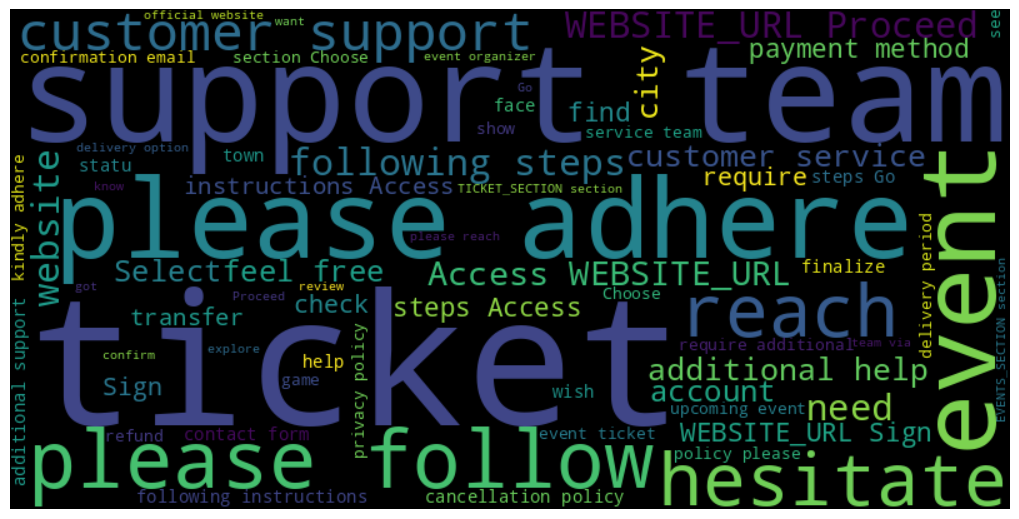

In [ ]:
# 1. Combine text from 'instruction' and 'response' columns
# We convert everything to string and join them with a space
all_text = " ".join(df['instruction'].astype(str)) + " " + " ".join(df['response'].astype(str))

# 2. Define Stop Words
my_stopwords = set(STOPWORDS)

# 3. Generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    stopwords=my_stopwords,
    min_font_size=10
).generate(all_text)

# 4. Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers
plt.tight_layout(pad=0)

plt.show()

##      

## **2. Category Count Plot**

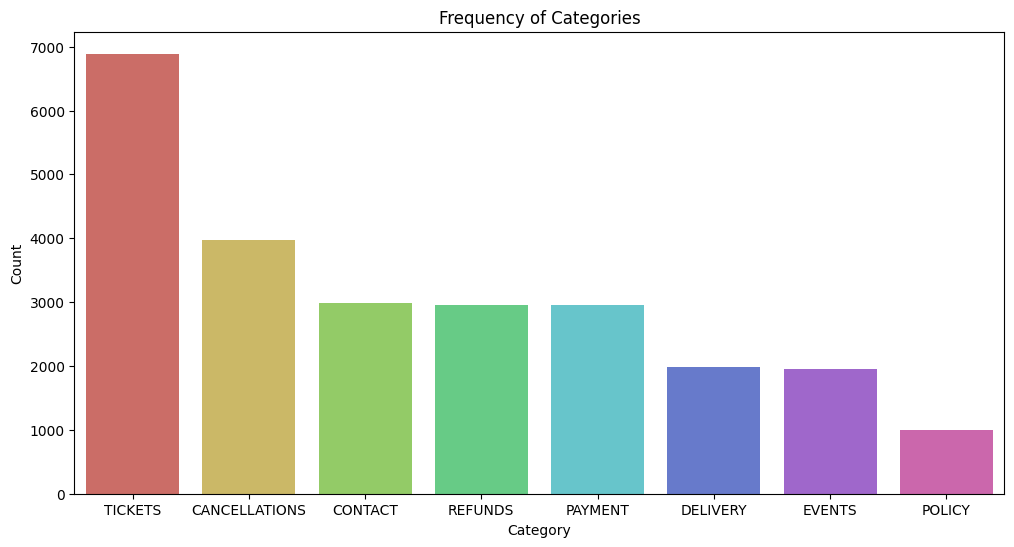

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['category'].value_counts().index,
            y=df['category'].value_counts().values,
            palette='hls')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

##      

## **3. Intent Count Plot**

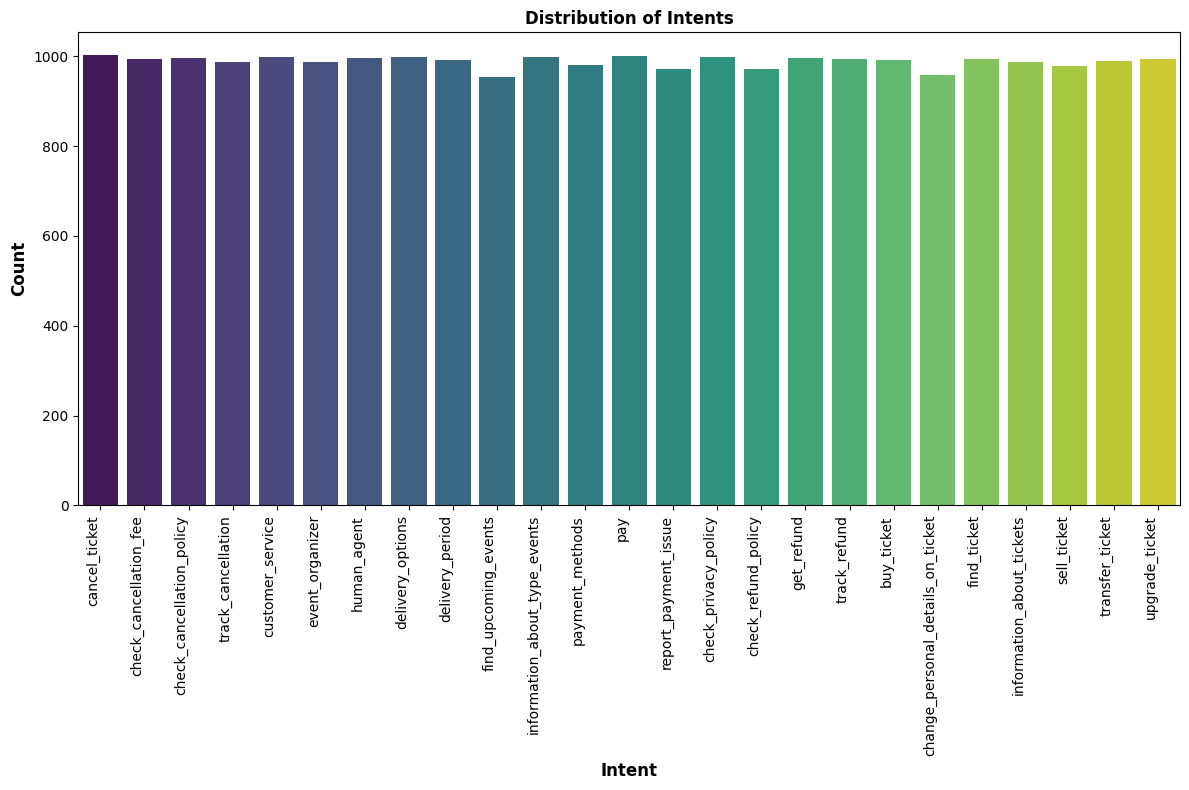

In [ ]:
# Distribution of 'intent'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='intent', palette='viridis')
plt.title('Distribution of Intents', fontsize=12, fontweight='bold')
plt.xlabel('Intent', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### **Observation** :
- The intent distribution in the dataset is relatively balanced, with most intents having counts near 1000. While a few intents like **change_personal_details_on_ticket** and **find_upcoming_events** have slightly lower frequencies, there are no significant imbalances. This suggests that the data is well-distributed for training, but it’s still important to optimize the chatbot to handle both high- and low-frequency intents effectively to ensure comprehensive coverage.

##      

## **4. Heat Map**

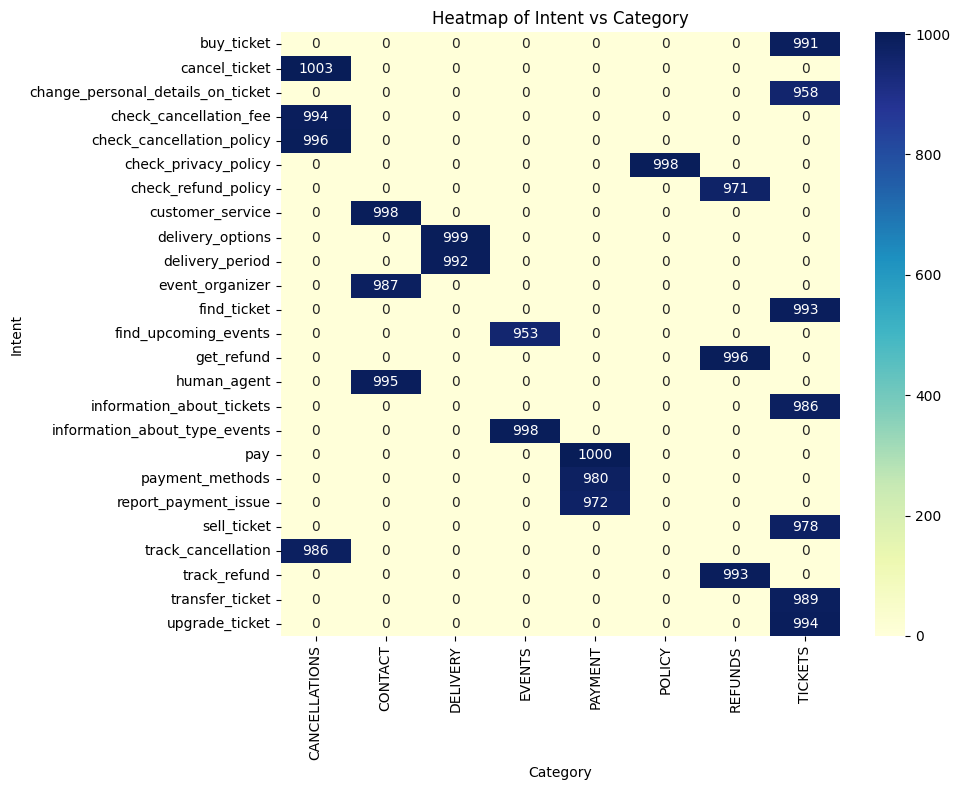

In [ ]:
# Heatmap of Intent vs Category
intent_category_crosstab = pd.crosstab(df['intent'], df['category'])

plt.figure(figsize=(10, 8))
sns.heatmap(intent_category_crosstab, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Intent vs Category')
plt.ylabel('Intent')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

In [ ]:
# Keep only the necessary columns: 'instruction', 'intent', 'response'
df = df[['instruction', 'intent', 'response']]
df.head()

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nIf you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nIf you require further support, our customer service team is available to assist you."
4,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


#####   

## **Assistant Identity & Persona Dataset**
- For training the model to accurately describe itself and its creator

In [ ]:
identity_and_creator = pd.read_csv("/content/identity_creator_Extended_2892.csv")
identity_and_creator

,instruction,intent,response
0,Who created you?,creator,"I am Eventra, an AI assistant created by Pradeep."
1,Who is your creator?,creator,"I am Eventra, an AI assistant created by Pradeep."
2,Who built you?,creator,"I am Eventra, an AI assistant created by Pradeep."
3,Who made you?,creator,"I am Eventra, an AI assistant created by Pradeep."
4,By whom were you created?,creator,"I am Eventra, an AI assistant created by Pradeep."
...,...,...,...
2887,"To clarify beyond any reasonable doubt, you are an AI, definitively not a human agent, in this interaction?",identity+,"Yes, I am Eventra, an AI assistant designed to help with various event ticket-related queries such as finding tickets, bookings, cancellations, refunds, and more."
2888,This feels like a dialogue with a highly capable digital intelligence; am I accurately perceiving your nature?,identity+,"Yes, I am Eventra, an AI assistant designed to help with various event ticket-related queries such as finding tickets, bookings, cancellations, refunds, and more."
2889,"Confirming one last time, you're an AI that helps with all aspects of event tickets, including complex queries?",identity+,"Yes, I am Eventra, an AI assistant designed to help with various event ticket-related queries such as finding tickets, bookings, cancellations, refunds, and more."
2890,Are you an automated assistant solely dedicated to providing comprehensive information and support for events?,identity+,"Yes, I am Eventra, an AI assistant designed to help with various event ticket-related queries such as finding tickets, bookings, cancellations, refunds, and more."


##    

## **Out-of-Domain Queries Dataset**
- For handling out-of-scope questions with polite refusals instead of providing incorrect information

In [ ]:
OOD = pd.read_csv("/content/extra-large-out-of-domain.csv")
OOD

,instruction,intent,response
0,Explain the principles of electromagnetism.,out-of-domain,"Sorry for the inconvenience, but I can’t assist with this. Can I help you with anything related to event tickets?"
1,What is the strong nuclear force?,out-of-domain,"Sorry for the inconvenience, but I can’t assist with this. Can I help you with anything related to event tickets?"
2,Describe the concept of entropy in thermodynamics.,out-of-domain,"I’m sorry, but I’m unable to assist you in this case. Do you need help with anything related to event tickets?"
3,How does a laser work?,out-of-domain,"Sorry, but I'm unable to assist with this. Is there anything related to event tickets I can help you with?"
4,What is the theory of special relativity?,out-of-domain,"I’m sorry, but this is beyond my ability to assist. How about I help you with event tickets?"
...,...,...,...
3781,What is the history of abstract expressionism?,out-of-domain,"Sorry for the inconvenience, but I can’t assist with this. Can I help you with anything related to event tickets?"
3782,Explain the concept of the authority bias.,out-of-domain,"Sorry, but I can't offer help with this. Would you like assistance with event tickets instead?"
3783,What are the major characteristics of Surrealist art?,out-of-domain,"I’m sorry, but I can't assist in this case. If you have any event ticket-related inquiries, I’d be happy to help."
3784,Describe the art of stone carving.,out-of-domain,"I regret that I can’t assist with this particular request. However, if you need help with event tickets, I’m here for that!"


##    

## **Preparing the Complete Training Dataset**
- Includes Primary, Identity, and Out-of-Domain Data

In [ ]:
df = pd.concat([df, identity_and_creator, OOD], axis = 0, ignore_index=True)
df

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nIf you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nIf you require further support, our customer service team is available to assist you."
4,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."
...,...,...,...
31373,What is the history of abstract expressionism?,out-of-domain,"Sorry for the inconvenience, but I can’t assist with this. Can I help you with anything related to event tickets?"
31374,Explain the concept of the authority bias.,out-of-domain,"Sorry, but I can't offer help with this. Would you like assistance with event tickets instead?"
31375,What are the major characteristics of Surrealist art?,out-of-domain,"I’m sorry, but I can't assist in this case. If you have any event ticket-related inquiries, I’d be happy to help."
31376,Describe the art of stone carving.,out-of-domain,"I regret that I can’t assist with this particular request. However, if you need help with event tickets, I’m here for that!"


In [ ]:
print(df.isna().sum())

instruction    0
intent         0
response       0
dtype: int64


In [ ]:
print(df['instruction'].duplicated().sum())

612


In [ ]:
df.drop_duplicates(subset = ['instruction'], inplace=True, ignore_index=True)
df

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nIf you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nIf you require further support, our customer service team is available to assist you."
3,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."
4,Wanna cancel my ticket for the show in this town how to do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Go to {{WEBSITE_URL}} and sign in to your account.\n2. Move to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your scheduled events and choose the {{EVENT}} in {{CITY}}.\n4. Click the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the prompts to finalize your cancellation.\n\nIf you face any difficulties, please reach out to our customer support for further help."
...,...,...,...
30761,What is the history of abstract expressionism?,out-of-domain,"Sorry for the inconvenience, but I can’t assist with this. Can I help you with anything related to event tickets?"
30762,Explain the concept of the authority bias.,out-of-domain,"Sorry, but I can't offer help with this. Would you like assistance with event tickets instead?"
30763,What are the major characteristics of Surrealist art?,out-of-domain,"I’m sorry, but I can't assist in this case. If you have any event ticket-related inquiries, I’d be happy to help."
30764,Describe the art of stone carving.,out-of-domain,"I regret that I can’t assist with this particular request. However, if you need help with event tickets, I’m here for that!"


In [ ]:
df['intent'].value_counts()

,count
intent,
out-of-domain,3786
creator,1350
identity,1196
buy_ticket,990
transfer_ticket,988
find_ticket,987
human_agent,987
upgrade_ticket,984
customer_service,983


####  

# **Model Building - Fine-tuning DistilGPT-2 Model**

## **DistilGPT-2: A Distilled Version of GPT-2**
**`DistilGPT-2`** is a smaller, faster, and more efficient version of OpenAI's **`GPT-2`** (Generative Pre-trained Transformer 2), created using a technique called **knowledge distillation**. It was developed by **Hugging Face** to retain much of GPT-2's language generation capabilities while being significantly lighter in terms of computational resources.

---

## **Key Features of DistilGPT-2**
1. **Smaller Model Size**  
   - GPT-2 comes in multiple sizes (124M, 355M, 774M, 1.5B parameters), while DistilGPT-2 has **82M parameters** (about 60% smaller than GPT-2 Small).
   - This makes it more efficient for deployment in resource-constrained environments.

2. **Retained Performance**  
   - Despite being smaller, DistilGPT-2 retains much of GPT-2’s language generation ability.
   - It achieves comparable performance on many benchmarks while being faster.

3. **Knowledge Distillation**  
   - The model was trained using **knowledge distillation**, where a smaller model (the student) learns to mimic the behavior of a larger model (the teacher, GPT-2).
   - The process involves:
     - Training on the original GPT-2’s outputs.
     - Using **masked language modeling (MLM)** for optimization.
     - Reducing model depth (fewer layers) while keeping the same hidden dimension.

4. **Faster Inference**  
   - Due to fewer parameters, DistilGPT-2 is **faster at inference** than GPT-2, making it suitable for real-time applications.

5. **Open-Source & Commercially Viable**  
   - Unlike GPT-3, which is proprietary, DistilGPT-2 is **open-source** and can be fine-tuned for specific tasks.

---

## **Architecture Differences (vs. GPT-2)**
| Feature        | GPT-2 Small | DistilGPT-2 |
|---------------|------------|------------|
| **Parameters**  | 124M       | 82M        |
| **Layers**     | 12         | 6          |
| **Heads**      | 12         | 12         |
| **Hidden Dim** | 768        | 768        |
| **Context Window** | 1024 tokens | 1024 tokens |

- DistilGPT-2 **halves the number of layers** but keeps other dimensions the same.
- The reduction in layers leads to faster training and inference.

---

## **Training Process**
1. **Pre-training**  
   - DistilGPT-2 was trained on the **OpenWebText** corpus (a reproduction of WebText, GPT-2’s training dataset).
   - The training objective was to **predict the next word** in a sequence (autoregressive modeling).

2. **Knowledge Distillation**  
   - The student model (DistilGPT-2) was trained to match:
     - The **logits** (output probabilities) of GPT-2.
     - The **hidden states** (intermediate representations) of GPT-2.
   - Loss functions used:
     - **Language modeling loss** (standard next-token prediction).
     - **Distillation loss** (mimicking GPT-2’s behavior).

3. **Optimization**  
   - Used **Adam optimizer** with weight decay.
   - Trained on **8x NVIDIA V100 GPUs** for efficiency.

---

## **Performance Comparison**
| Model         | Size (Params) | Speed (Inference) | Perplexity (Lower is better) |
|--------------|--------------|------------------|-----------------------------|
| GPT-2 Small  | 124M         | Baseline (1x)    | ~20-25                     |
| **DistilGPT-2** | **82M**      | **~1.5x faster** | **~25-30**                 |

- DistilGPT-2 has slightly higher perplexity (worse) than GPT-2 but is significantly faster.
- It retains **~95% of GPT-2’s performance** while being much smaller.

---

## **Use Cases**
1. **Text Generation**  
   - Can be used for **chatbots**, **story writing**, and **content creation**.
2. **Fine-tuning for Downstream Tasks**  
   - Can be adapted for **summarization**, **translation**, or **sentiment analysis**.
3. **Edge & Mobile Deployment**  
   - Due to its smaller size, it can run on **devices with limited compute**.
4. **Research & Prototyping**  
   - Useful for experimenting with transformer models without heavy compute requirements.

---

## **Limitations**
- **Weaker than full GPT-2/3**: Loses some nuance in long-form text generation.
- **No zero-shot learning**: Unlike GPT-3, it requires fine-tuning for specific tasks.
- **Limited context understanding**: Struggles with very long-range dependencies.

In [ ]:
# Create a dataset from the pandas DataFrame
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['instruction', 'intent', 'response'],
    num_rows: 30766
})

In [ ]:
# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

In [ ]:
#Sample tokenization
sample_response = df['response'].iloc[0]
tokens = tokenizer.tokenize(sample_response)
print(tokens)

['To', 'Ġcancel', 'Ġyour', 'Ġticket', 'Ġfor', 'Ġthe', 'Ġ{{', 'EV', 'ENT', '}}', 'Ġin', 'Ġ{{', 'C', 'ITY', '}', '},', 'Ġplease', 'Ġfollow', 'Ġthese', 'Ġsteps', ':', 'Ċ', 'Ċ', '1', '.', 'ĠAccess', 'Ġ{{', 'WE', 'BS', 'ITE', '_', 'URL', '}}', 'Ġand', 'Ġsign', 'Ġin', 'Ġto', 'Ġyour', 'Ġaccount', '.', 'Ċ', '2', '.', 'ĠGo', 'Ġto', 'Ġthe', 'Ġ{{', 'C', 'ANC', 'EL', '_', 'T', 'ICK', 'ET', '_', 'S', 'ECTION', '}}', 'Ġsection', '.', 'Ċ', '3', '.', 'ĠL', 'ocate', 'Ġyour', 'Ġupcoming', 'Ġevents', 'Ġand', 'Ġclick', 'Ġon', 'Ġthe', 'Ġ{{', 'EV', 'ENT', '}}', 'Ġin', 'Ġ{{', 'C', 'ITY', '}}', '.', 'Ċ', '4', '.', 'ĠSelect', 'Ġthe', 'Ġ{{', 'C', 'ANC', 'EL', '_', 'T', 'ICK', 'ET', '_', 'OP', 'TION', '}}', 'Ġoption', '.', 'Ċ', '5', '.', 'ĠComplete', 'Ġthe', 'Ġprompts', 'Ġto', 'Ġfinal', 'ize', 'Ġyour', 'Ġcancellation', '.', 'Ċ', 'Ċ', 'If', 'Ġany', 'Ġissues', 'Ġarise', ',', 'Ġdo', 'Ġnot', 'Ġhesitate', 'Ġto', 'Ġreach', 'Ġout', 'Ġto', 'Ġour', 'Ġcustomer', 'Ġsupport', 'Ġfor', 'Ġfurther', 'Ġhelp', '.']


In [ ]:
model = GPT2LMHeadModel.from_pretrained('distilgpt2')

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Prepare data for training
def prepare_data(examples):
    # Combine instruction and response with a separator
    texts = [f"Instruction: {inst} Response: {resp}"
             for inst, resp in zip(examples['instruction'], examples['response'])]

    # Tokenize
    encodings = tokenizer(texts, truncation=True, padding='max_length',
                         max_length=256, return_tensors='pt')

    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': encodings['input_ids'].clone()
    }

In [ ]:
# Apply preprocessing
train_dataset = dataset.map(prepare_data, batched=True)

Map:   0%|          | 0/30766 [00:00<?, ? examples/s]

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    save_strategy="epoch",
)

In [ ]:
# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

In [ ]:
import wandb
wandb.login(key="your_wandb_api_key")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: zlibbrary4 (zlibbrary4-iit-hyderabad) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Train the model
trainer.train()

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
500,0.382800
1000,0.240700
1500,0.219700
2000,0.209600
2500,0.199500
3000,0.191400
3500,0.184100
4000,0.176700
4500,0.167300
5000,0.162500


Step,Training Loss
500,0.382800
1000,0.240700
1500,0.219700
2000,0.209600
2500,0.199500
3000,0.191400
3500,0.184100
4000,0.176700
4500,0.167300
5000,0.162500


TrainOutput(global_step=38460, training_loss=0.12390977400265445, metrics={'train_runtime': 14507.6201, 'train_samples_per_second': 21.207, 'train_steps_per_second': 2.651, 'total_flos': 2.009763957178368e+16, 'train_loss': 0.12390977400265445, 'epoch': 10.0})

In [ ]:
# Save the model to Google Drive
model.save_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')
tokenizer.save_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')

('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned/tokenizer_config.json',
 '/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned/special_tokens_map.json',
 '/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned/vocab.json',
 '/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned/merges.txt',
 '/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned/added_tokens.json')

##       

# **Inference**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers.generation.streamers import TextStreamer
import torch

model.save_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')
tokenizer.save_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')

In [ ]:
# Custom streamer that trims leading spaces/newlines during live output
class TrimLeadingTextStreamer(TextStreamer):
    def __init__(self, tokenizer, skip_prompt=True, **kwargs):
        # Be compatible with different transformers versions
        try:
            # Older signature that accepts skip_special_tokens directly
            super().__init__(tokenizer, skip_prompt=skip_prompt, **kwargs)
        except TypeError:
            # Newer signature uses decode_kwargs
            decode_kwargs = kwargs.pop("decode_kwargs", {})
            decode_kwargs.setdefault("skip_special_tokens", True)
            super().__init__(tokenizer, skip_prompt=skip_prompt, decode_kwargs=decode_kwargs)
        self._started = False

    def on_finalized_text(self, text, stream_end=False):
        if not self._started:
            text = text.lstrip()  # remove any leading spaces/newlines
            if text:
                self._started = True
            else:
                return  # swallow pure-whitespace chunks at the start
        return super().on_finalized_text(text, stream_end=stream_end)

def generate_response(instruction, max_length=256):
    device = model.device  # Get the model's device (CUDA or CPU)
    model.eval()

    input_text = f"Instruction: {instruction} Response:"

    # Tokenize the input and move the tensors to the same device as the model
    inputs = tokenizer(input_text, return_tensors='pt', padding=True).to(device)

    # Streamer that trims leading whitespace in the live output
    streamer = TrimLeadingTextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_length=max_length,
            num_return_sequences=1,
            temperature=0.5,
            top_p=0.95,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            streamer=streamer
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract the response part after "Response:"
    response_start = response.find("Response:") + len("Response:")
    return response[response_start:].strip()

In [ ]:
# Example usage
if __name__ == "__main__":
    # Test the chatbot
    test_instruction = "How can I sell my ticket?"
    test_instruction = test_instruction[0].upper() + test_instruction[1:]
    print('Chatbot 🤖:')
    response = generate_response(test_instruction)

Chatbot 🤖:
To initiate the process of selling or exchanging your event ticket, please adhere to the following steps:

1. Access {{WEBSITE_URL}} and sign into your account.
2. Proceed to the {{TICKET_SECTION}} section.
3. Choose the ticket you wish to sell or exchange.
4. Click on the {{SELL_TICKET_OPTION}} option.
5. Fill in the necessary details and confirm your action.

Following these steps will help you efficiently manage your event tickets. If you face any difficulties, feel free to contact customer support for further help.


##       

# **Final Model Inference with GLiNER Integration and Placeholder Replacement**

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextIteratorStreamer
import torch
from gliner import GLiNER

import warnings
warnings.filterwarnings('ignore')

from threading import Thread

# Load the GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')
tokenizer = GPT2Tokenizer.from_pretrained('/content/drive/My Drive/Chatbot_GPU/Final_Advanced_event_ticketing_DistilGPT2_fine-tuned')


# Load GLiNER model for NER
gliner_model = GLiNER.from_pretrained("gliner-community/gliner_small-v2.5")

# Define static placeholders
static_placeholders = {
    "{{WEBSITE_URL}}": "[website](https://github.com/MarpakaPradeepSai)",
    "{{SUPPORT_TEAM_LINK}}": "[support team](https://github.com/MarpakaPradeepSai)",
    "{{CONTACT_SUPPORT_LINK}}": "[support team](https://github.com/MarpakaPradeepSai)",
    "{{SUPPORT_CONTACT_LINK}}": "[support team](https://github.com/MarpakaPradeepSai)",
    "{{CANCEL_TICKET_SECTION}}": "<b>Cancel Ticket</b>",
    "{{CANCEL_TICKET_OPTION}}": "<b>Cancel Ticket</b>",
    "{{GET_REFUND_OPTION}}": "<b>Get Refund</b>",
    "{{UPGRADE_TICKET_INFORMATION}}": "<b>Upgrade Ticket Information</b>",
    "{{TICKET_SECTION}}": "<b>Ticketing</b>",
    "{{CANCELLATION_POLICY_SECTION}}": "<b>Cancellation Policy</b>",
    "{{CHECK_CANCELLATION_POLICY_OPTION}}": "<b>Check Cancellation Policy</b>",
    "{{APP}}": "<b>App</b>",
    "{{CHECK_CANCELLATION_FEE_OPTION}}": "<b>Check Cancellation Fee</b>",
    "{{CHECK_REFUND_POLICY_OPTION}}": "<b>Check Refund Policy</b>",
    "{{CHECK_PRIVACY_POLICY_OPTION}}": "<b>Check Privacy Policy</b>",
    "{{SAVE_BUTTON}}": "<b>Save</b>",
    "{{EDIT_BUTTON}}": "<b>Edit</b>",
    "{{CANCELLATION_FEE_SECTION}}": "<b>Cancellation Fee</b>",
    "{{CHECK_CANCELLATION_FEE_INFORMATION}}": "<b>Check Cancellation Fee Information</b>",
    "{{PRIVACY_POLICY_LINK}}": "<b>Privacy Policy</b>",
    "{{REFUND_SECTION}}": "<b>Refund</b>",
    "{{REFUND_POLICY_LINK}}": "<b>Refund Policy</b>",
    "{{CUSTOMER_SERVICE_SECTION}}": "<b>Customer Service</b>",
    "{{DELIVERY_PERIOD_INFORMATION}}": "<b>Delivery Period</b>",
    "{{EVENT_ORGANIZER_OPTION}}": "<b>Event Organizer</b>",
    "{{FIND_TICKET_OPTION}}": "<b>Find Ticket</b>",
    "{{FIND_UPCOMING_EVENTS_OPTION}}": "<b>Find Upcoming Events</b>",
    "{{CONTACT_SECTION}}": "<b>Contact</b>",
    "{{SEARCH_BUTTON}}": "<b>Search</b>",
    "{{SUPPORT_SECTION}}": "<b>Support</b>",
    "{{EVENTS_SECTION}}": "<b>Events</b>",
    "{{EVENTS_PAGE}}": "<b>Events</b>",
    "{{TYPE_EVENTS_OPTION}}": "<b>Type Events</b>",
    "{{PAYMENT_SECTION}}": "<b>Payment</b>",
    "{{PAYMENT_OPTION}}": "<b>Payment</b>",
    "{{CANCELLATION_SECTION}}": "<b>Cancellation</b>",
    "{{CANCELLATION_OPTION}}": "<b>Cancellation</b>",
    "{{REFUND_OPTION}}": "<b>Refund</b>",
    "{{TRANSFER_TICKET_OPTION}}": "<b>Transfer Ticket</b>",
    "{{REFUND_STATUS_OPTION}}": "<b>Refund Status</b>",
    "{{DELIVERY_SECTION}}": "<b>Delivery</b>",
    "{{SELL_TICKET_OPTION}}": "<b>Sell Ticket</b>",
    "{{CANCELLATION_FEE_INFORMATION}}": "<b>Cancellation Fee Information</b>",
    "{{CUSTOMER_SUPPORT_PAGE}}": "<b>Customer Support</b>",
    "{{PAYMENT_METHOD}}": "<b>Payment</b>",
    "{{VIEW_PAYMENT_METHODS}}": "<b>View Payment Methods</b>",
    "{{VIEW_CANCELLATION_POLICY}}": "<b>View Cancellation Policy</b>",
    "{{SUPPORT_ SECTION}}": "<b>Support</b>",
    "{{CUSTOMER_SUPPORT_SECTION}}": "<b>Customer Support</b>",
    "{{HELP_SECTION}}": "<b>Help</b>",
    "{{TICKET_INFORMATION}}": "<b>Ticket Information</b>",
    "{{UPGRADE_TICKET_BUTTON}}": "<b>Upgrade Ticket</b>",
    "{{CANCEL_TICKET_BUTTON}}": "<b>Cancel Ticket</b>",
    "{{GET_REFUND_BUTTON}}": "<b>Get Refund</b>",
    "{{PAYMENTS_HELP_SECTION}}": "<b>Payments Help</b>",
    "{{PAYMENTS_PAGE}}": "<b>Payments</b>",
    "{{TICKET_DETAILS}}": "<b>Ticket Details</b>",
    "{{TICKET_INFORMATION_PAGE}}": "<b>Ticket Information</b>",
    "{{REPORT_PAYMENT_PROBLEM}}": "<b>Report Payment</b>",
    "{{TICKET_OPTIONS}}": "<b>Ticket Options</b>",
    "{{SEND_BUTTON}}": "<b>Send</b>",
    "{{PAYMENT_ISSUE_OPTION}}": "<b>Payment Issue</b>",
    "{{CUSTOMER_SUPPORT_PORTAL}}": "<b>Customer Support</b>",
    "{{UPGRADE_TICKET_OPTION}}": "<b>Upgrade Ticket</b>",
    "{{TICKET_AVAILABILITY_TAB}}": "<b>Ticket Availability</b>",
    "{{TRANSFER_TICKET_BUTTON}}": "<b>Transfer Ticket</b>",
    "{{TICKET_MANAGEMENT}}": "<b>Ticket Management</b>",
    "{{TICKET_STATUS_TAB}}": "<b>Ticket Status</b>",
    "{{TICKETING_PAGE}}": "<b>Ticketing</b>",
    "{{TICKET_TRANSFER_TAB}}": "<b>Ticket Transfer</b>",
    "{{CURRENT_TICKET_DETAILS}}": "<b>Current Ticket Details</b>",
    "{{UPGRADE_OPTION}}": "<b>Upgrade</b>",
    "{{CONNECT_WITH_ORGANIZER}}": "<b>Connect with Organizer</b>",
    "{{TICKETS_TAB}}": "<b>Tickets</b>",
    "{{ASSISTANCE_SECTION}}": "<b>Assistance Section</b>",
}

def extract_dynamic_placeholders(instruction):
    """Extract dynamic placeholders (e.g., event, city) from the instruction using GLiNER."""
    dynamic_placeholders = {}

    # Define the labels we want to extract
    labels = ["event", "city", "location", "concert", "festival", "show", "match", "game", "venue"]

    # Predict entities using GLiNER
    entities = gliner_model.predict_entities(instruction, labels, threshold=0.4)

    for entity in entities:
        entity_text = entity["text"]
        entity_label = entity["label"].lower()

        # Map entity labels to placeholders
        if entity_label in ["event", "concert", "festival", "show", "match", "game"]:
            event_text = entity_text.title()
            dynamic_placeholders['{{EVENT}}'] = f"<b>{event_text}</b>"
        elif entity_label in ["city", "location", "venue"]:
            city_text = entity_text.title()
            dynamic_placeholders['{{CITY}}'] = f"<b>{city_text}</b>"

    # Default values if no entities are found
    if '{{EVENT}}' not in dynamic_placeholders:
        dynamic_placeholders['{{EVENT}}'] = "event"
    if '{{CITY}}' not in dynamic_placeholders:
        dynamic_placeholders['{{CITY}}'] = "city"

    return dynamic_placeholders

def replace_placeholders(response, dynamic_placeholders, static_placeholders):
    """Replace static and dynamic placeholders in the response."""
    # Replace static placeholders first
    for placeholder, value in static_placeholders.items():
        response = response.replace(placeholder, value)

    # Replace dynamic placeholders
    for placeholder, value in dynamic_placeholders.items():
        response = response.replace(placeholder, value)

    return response

def generate_response(instruction, max_length=256):
    """Non-streaming generation (kept, but trims leading whitespace)."""
    device = model.device  # Get the model's device (CUDA or CPU)
    model.eval()

    # Extract dynamic placeholders from the instruction
    dynamic_placeholders = extract_dynamic_placeholders(instruction)

    input_text = f"Instruction: {instruction} Response:"
    inputs = tokenizer(input_text, return_tensors='pt', padding=True).to(device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_length=max_length,
            num_return_sequences=1,
            temperature=0.5,
            top_p=0.95,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract the response part after "Response:"
    response_start = response.find("Response:") + len("Response:")
    raw_response = response[response_start:].lstrip()  # Trim leading whitespace

    # Replace placeholders in the generated response
    final_response = replace_placeholders(raw_response, dynamic_placeholders, static_placeholders)

    return final_response

def generate_response_streaming(instruction, max_length=256, output_fn=None):
    """
    Stream tokens as they are generated and replace placeholders live.
    Also trims any leading whitespace at the very start of the streamed text.
    - output_fn: optional function to receive streamed text chunks (defaults to print).
    Returns the final fully-processed response string.
    """
    device = model.device
    model.eval()

    dynamic_placeholders = extract_dynamic_placeholders(instruction)

    # Build streamer
    streamer = TextIteratorStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    # Prepare inputs
    input_text = f"Instruction: {instruction} Response:"
    inputs = tokenizer(input_text, return_tensors='pt', padding=True).to(device)

    # Launch generation in a background thread (so we can consume the stream)
    gen_kwargs = dict(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=max_length,
        temperature=0.4,
        top_p=0.95,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
        streamer=streamer
    )
    thread = Thread(target=model.generate, kwargs=gen_kwargs)
    thread.start()

    # Default output to stdout
    if output_fn is None:
        def output_fn(s):
            print(s, end="", flush=True)

    # To avoid printing partial placeholders that span chunks, hold back up to the
    # maximum placeholder key length minus 1, then flush at the end.
    all_keys = list(static_placeholders.keys()) + list(dynamic_placeholders.keys())
    max_placeholder_len = max(len(k) for k in all_keys) if all_keys else 0
    hold_back = max(0, max_placeholder_len - 1)

    raw_buffer = ""
    last_printed_len = 0
    final_processed = ""
    initial_ws_trimmed = False  # ensure no leading whitespace is shown

    for new_text in streamer:
        raw_buffer += new_text

        # Replace placeholders incrementally on the entire buffer (idempotent).
        processed = replace_placeholders(raw_buffer, dynamic_placeholders, static_placeholders)
        final_processed = processed

        # Print only up to len(processed) - hold_back to avoid partial placeholders.
        printable_len = max(0, len(processed) - hold_back)
        if printable_len > last_printed_len:
            chunk = processed[last_printed_len:printable_len]

            if chunk:
                # On the very first output, trim leading whitespace (GPT-2 often starts with a space)
                if not initial_ws_trimmed:
                    stripped = chunk.lstrip()
                    if stripped:
                        output_fn(stripped)
                        initial_ws_trimmed = True
                    # If chunk was only whitespace, skip printing it entirely
                else:
                    output_fn(chunk)

            # Mark everything up to printable_len as consumed (even if we trimmed leading spaces)
            last_printed_len = printable_len

    # Wait for generation to finish and flush remainder (no need to hold back anymore)
    thread.join()
    if last_printed_len < len(final_processed):
        tail = final_processed[last_printed_len:]
        if not initial_ws_trimmed:
            tail = tail.lstrip()
            initial_ws_trimmed = True
        output_fn(tail)

    return final_processed

The module name Advanced Event Ticketing Chatbot (originally Advanced Event Ticketing Chatbot) is not a valid Python identifier. Please rename the original module to avoid import issues.


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

gliner_config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

models_comparison.png:   0%|          | 0.00/156k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/664M [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

In [ ]:
# Interactive example usage
if __name__ == "__main__":
    user_question = input("Enter your question: ")
    if user_question:
        user_question = user_question[0].upper() + user_question[1:]

    print("\nUser:", user_question)
    print("\nChatbot:\n", end="", flush=True)

    # Stream the response live with placeholders replaced on the fly
    response = generate_response_streaming(user_question)

    # Optional: print a newline after streaming finishes
    print()

Enter your question:  How can I cancel my ticket for the upcoming cricket event in mumbai?

User:  How can I cancel my ticket for the upcoming cricket event in mumbai?

Chatbot:
To cancel your ticket for the <b>Cricket</b> in <b>Mumbai</b>, please follow these steps:

1. Go to [website](https://github.com/MarpakaPradeepSai) and sign into your account.
2. Head to the <b>Cancel Ticket</b> page.
3. Locate your scheduled events and choose the <b>Cricket</b> in <b>Mumbai</b>.
4. Select the <b>Cancel Ticket</b> button.
5. Complete the process by following the on-screen instructions for cancellation.

If you face any difficulties, feel free to reach out to our customer support team for assistance.


##     

<div style="text-align: center;">
    <img src="https://github.com/JustToTryModels/IMAGES/blob/main/thank-you-33.gif?raw=true" width="400"/>
</div>